(-300.0, 300.0, -300.0, 300.0)

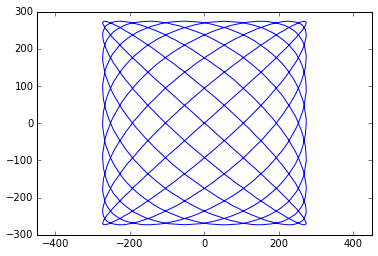

In [1]:
#Read Brother .pes embroidery files & display the image.
#Does not handle color changes
#CKH 2015
import struct
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

with open('lissajous.pes', 'rt') as f:
    data = f.read().strip()
B=[struct.unpack('@B',byte)[0] for byte in data] #@B unsigned ints
#B is a list of ints in the file.

#B contains stitch coordinates for editing
#Followed by stitch increments: x and y displacements for moving the machine's translation stage
#Followed by a bitmap to display on the machine's LCD
#Thread color and bounding box information is scattered around too.
#PES is a proprietary format with unpublished file specification.

#This code uses pecstart as a pointer to the stitch increment data 
#The increment data goes into a plot of the embroidered pattern.
#More information about these offsets at http://www.achatina.de/sewing/main/PEC.HTM

pecstart=B[8]+256*B[9]+65536*B[10]
graphicloc=B[pecstart+514]+B[pecstart+515]*256+B[pecstart+516]*65536;
xsize=B[pecstart+520]+256*B[pecstart+521]; #x extent in unit of 0.1 mm
ysize=B[pecstart+522]+256*B[pecstart+523]; #y extent

increments=B[pecstart+533+3:pecstart+graphicloc+512-1]

def makitsigned(item):#have to make a 7 bit signed int
    if item>63:
        return item-128
    else:
        return item
    
coords=[makitsigned(item) for item in increments]
x=np.cumsum(coords[0:len(coords):2])#undo the increments back to absolute x value
y=np.cumsum(coords[1:len(coords):2])#and y-value

plt.plot(x,-y)#for some reason y is upside down
plt.axis('equal')